In [19]:
#data analysis
import pandas as pd
import numpy

#modeling
from sklearn.preprocessing import MinMaxScaler

### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

#visualization
import matplotlib.pyplot as plt




In [20]:
df = pd.read_csv('data_clean.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [21]:
df

,Open,High,Low,Close,Volume,MarketCap,ForwardPE,TrailingPE,ForwardPEG,TrailingPEG
Date,,,,,,,,,,
2017-06-27,34.319020,34.591188,33.990053,34.016087,99047600,3.399217e+09,5.239545,5.592149,60.924941,65.024990
2017-06-28,34.195948,34.579347,33.881181,34.513081,88329600,3.020514e+09,5.220755,5.572095,60.706459,64.791805
2017-06-29,34.248023,34.347423,33.672922,34.004253,125997600,4.315169e+09,5.228706,5.580581,60.798905,64.890472
2017-06-30,34.186478,34.307180,34.027912,34.084713,92096400,3.148452e+09,5.219310,5.570552,60.689646,64.773861
2017-07-03,34.288248,34.387648,33.866982,33.961647,57111200,1.958243e+09,5.234847,5.587135,60.870314,64.966687
...,...,...,...,...,...,...,...,...,...,...
2022-06-21,133.419998,137.059998,133.320007,135.869995,81000500,1.080709e+10,20.369465,21.740264,236.854248,252.793764
2022-06-22,134.789993,137.759995,133.910004,135.350006,73409200,9.894826e+09,20.578625,21.963499,239.286336,255.389523
2022-06-23,136.820007,138.589996,135.630005,138.270004,72433800,9.910393e+09,20.888551,22.294282,242.890125,259.235835


In [22]:
df1=df[['Close']]

In [23]:
df1.head(2)

,Close
Date,
2017-06-27,34.016087
2017-06-28,34.513081


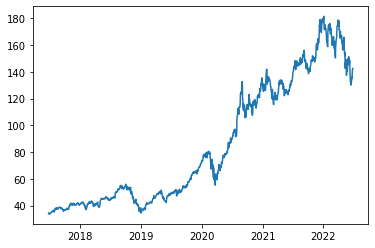

In [24]:
#plotting close price just to check 

plt.plot(df1)

In [25]:
#scaling

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
#split training and testt

training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
training_size,test_size

(944, 315)

In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(843, 100)
(843,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(214, 100)
(214,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
#fitting model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 5s 159ms/step - loss: 0.0262 - val_loss: 0.0725
Epoch 2/100
14/14 [==============================] - 1s 96ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 3/100
14/14 [==============================] - 1s 96ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 4/100
14/14 [==============================] - 1s 97ms/step - loss: 9.5558e-04 - val_loss: 0.0030
Epoch 5/100
14/14 [==============================] - 1s 102ms/step - loss: 8.3917e-04 - val_loss: 0.0028
Epoch 6/100
14/14 [==============================] - 1s 100ms/step - loss: 8.3068e-04 - val_loss: 0.0030
Epoch 7/100
14/14 [==============================] - 1s 102ms/step - loss: 7.8187e-04 - val_loss: 0.0038
Epoch 8/100
14/14 [==============================] - 1s 101ms/step - loss: 7.7401e-04 - val_loss: 0.0044
Epoch 9/100
14/14 [==============================] - 1s 104ms/step - loss: 7.3988e-04 - val_loss: 0.0030
Epoch 10/100
14/14 [==============================] - 2s 113ms/step - 

14/14 [==============================] - 1s 95ms/step - loss: 3.3252e-04 - val_loss: 0.0017
Epoch 80/100
14/14 [==============================] - 1s 94ms/step - loss: 3.0058e-04 - val_loss: 0.0014
Epoch 81/100
14/14 [==============================] - 1s 95ms/step - loss: 3.7891e-04 - val_loss: 0.0071
Epoch 82/100
14/14 [==============================] - 1s 93ms/step - loss: 4.3966e-04 - val_loss: 0.0024
Epoch 83/100
14/14 [==============================] - 1s 95ms/step - loss: 2.9177e-04 - val_loss: 0.0038
Epoch 84/100
14/14 [==============================] - 1s 94ms/step - loss: 2.7376e-04 - val_loss: 0.0031
Epoch 85/100
14/14 [==============================] - 1s 94ms/step - loss: 2.7400e-04 - val_loss: 0.0013
Epoch 86/100
14/14 [==============================] - 1s 97ms/step - loss: 2.7346e-04 - val_loss: 0.0012
Epoch 87/100
14/14 [==============================] - 1s 99ms/step - loss: 3.1700e-04 - val_loss: 0.0029
Epoch 88/100
14/14 [==============================] - 1s 95ms/step -

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 15ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

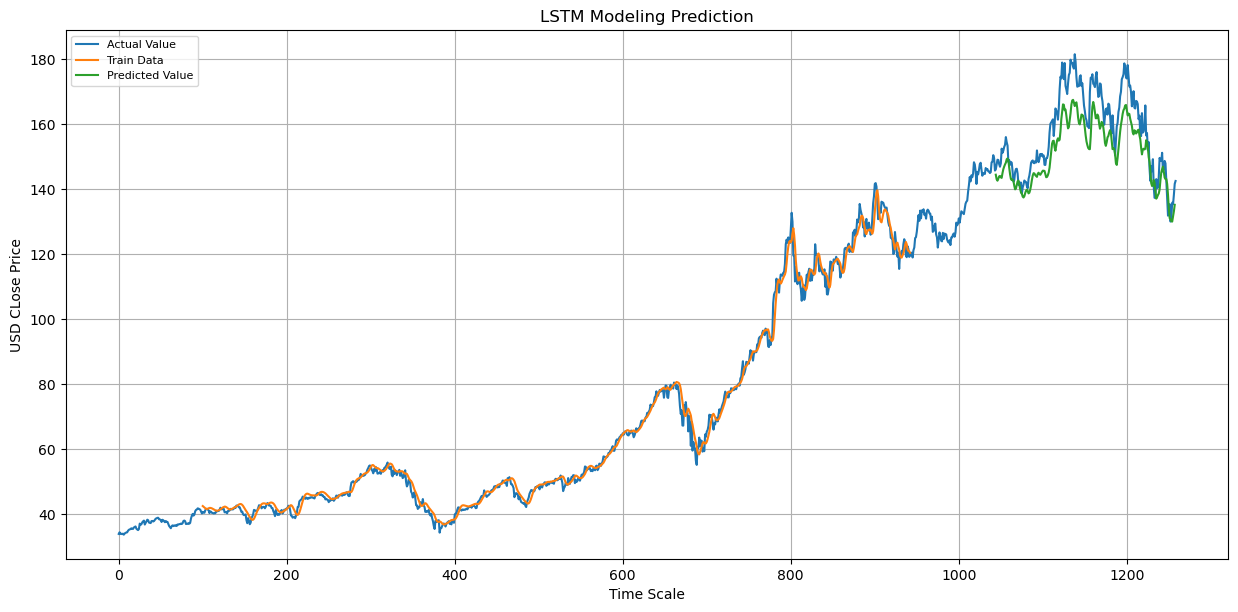

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions

#Predicted vs True Adj Close Value – LSTM

plt.figure(figsize=(15,7), dpi=100)
plt.grid(True)
plt.plot(scaler.inverse_transform(df1), label = 'Actual Value')
plt.plot(trainPredictPlot, label = 'Train Data')
plt.plot(testPredictPlot, label = 'Predicted Value' )
plt.title('LSTM Modeling Prediction')
plt.xlabel('Time Scale')
plt.ylabel('USD CLose Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
len(test_data)

315

In [40]:
x_input=test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1


[0.7176631]
101
1 day input [0.93850327 0.9365432  0.93160908 0.9530353  0.96283598 0.93471822
 0.91119673 0.91281885 0.93924683 0.93762471 0.91281885 0.90213951
 0.88199756 0.85327155 0.87131823 0.88557986 0.88740473 0.87442737
 0.89713785 0.89490727 0.87422451 0.84806703 0.83549507 0.87273759
 0.84279497 0.81717799 0.78939819 0.81961122 0.85002711 0.85698895
 0.87969943 0.88916215 0.91241334 0.92180851 0.94789844 0.95229185
 0.95823982 0.98095031 0.97290706 0.95154839 0.94952056 0.97743556
 0.95458987 0.93275815 0.93485343 0.9209973  0.89166293 0.90457285
 0.92309257 0.88855379 0.88706688 0.90281542 0.90166636 0.89619154
 0.86489699 0.87226444 0.83116932 0.82961475 0.8774013  0.83691444
 0.83900982 0.84928355 0.8934879  0.83096657 0.83597556 0.80064137
 0.8172254  0.76300574 0.73633586 0.76713483 0.75650745 0.78155284
 0.72455786 0.70106942 0.70269391 0.74005883 0.72144408 0.72252714
 0.74459405 0.7842604  0.77884518 0.77796528 0.79488778 0.75542449
 0.7605689  0.77796528 0.77288853 

11 day output [[0.6468139]]
12 day input [0.90213951 0.88199756 0.85327155 0.87131823 0.88557986 0.88740473
 0.87442737 0.89713785 0.89490727 0.87422451 0.84806703 0.83549507
 0.87273759 0.84279497 0.81717799 0.78939819 0.81961122 0.85002711
 0.85698895 0.87969943 0.88916215 0.91241334 0.92180851 0.94789844
 0.95229185 0.95823982 0.98095031 0.97290706 0.95154839 0.94952056
 0.97743556 0.95458987 0.93275815 0.93485343 0.9209973  0.89166293
 0.90457285 0.92309257 0.88855379 0.88706688 0.90281542 0.90166636
 0.89619154 0.86489699 0.87226444 0.83116932 0.82961475 0.8774013
 0.83691444 0.83900982 0.84928355 0.8934879  0.83096657 0.83597556
 0.80064137 0.8172254  0.76300574 0.73633586 0.76713483 0.75650745
 0.78155284 0.72455786 0.70106942 0.70269391 0.74005883 0.72144408
 0.72252714 0.74459405 0.7842604  0.77884518 0.77796528 0.79488778
 0.75542449 0.7605689  0.77796528 0.77288853 0.73687739 0.69958023
 0.66404298 0.66999963 0.68807285 0.65172334 0.66187685 0.69105122
 0.68753142 0.70729689

23 day output [[0.6277847]]
24 day input [0.87273759 0.84279497 0.81717799 0.78939819 0.81961122 0.85002711
 0.85698895 0.87969943 0.88916215 0.91241334 0.92180851 0.94789844
 0.95229185 0.95823982 0.98095031 0.97290706 0.95154839 0.94952056
 0.97743556 0.95458987 0.93275815 0.93485343 0.9209973  0.89166293
 0.90457285 0.92309257 0.88855379 0.88706688 0.90281542 0.90166636
 0.89619154 0.86489699 0.87226444 0.83116932 0.82961475 0.8774013
 0.83691444 0.83900982 0.84928355 0.8934879  0.83096657 0.83597556
 0.80064137 0.8172254  0.76300574 0.73633586 0.76713483 0.75650745
 0.78155284 0.72455786 0.70106942 0.70269391 0.74005883 0.72144408
 0.72252714 0.74459405 0.7842604  0.77884518 0.77796528 0.79488778
 0.75542449 0.7605689  0.77796528 0.77288853 0.73687739 0.69958023
 0.66404298 0.66999963 0.68807285 0.65172334 0.66187685 0.69105122
 0.68753142 0.70729689 0.7302438  0.73620045 0.71766311 0.71953434
 0.71499527 0.70758128 0.69887316 0.6896866  0.68057841 0.67197067
 0.66416234 0.65733314

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df1)

1259

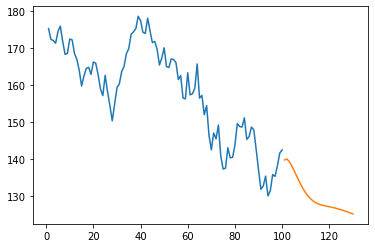

In [45]:
#plotting all but the last 100 days, see the 1159, which is 1259 (shape of df1 - actual), minus the last 30 days, to replace it. 
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

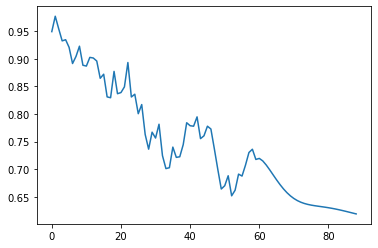

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

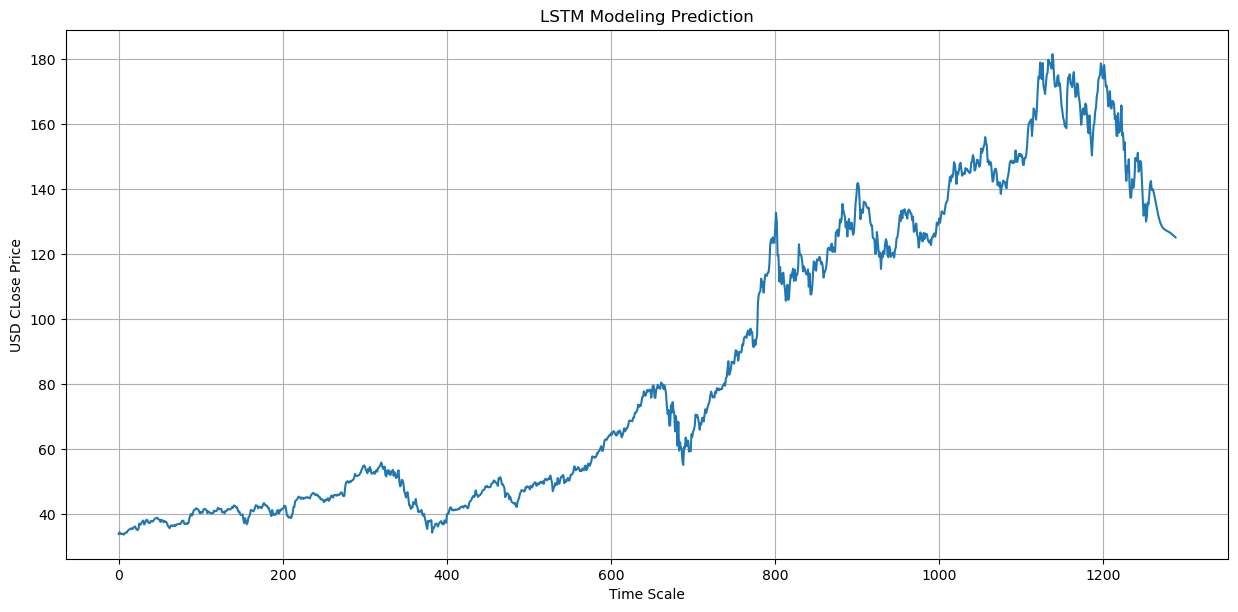

In [48]:
plt.figure(figsize=(15,7), dpi=100)
plt.grid(True)
plt.title('LSTM Modeling Prediction')
plt.xlabel('Time Scale')
plt.ylabel('USD CLose Price')
plt.plot(df3, label = 'Predicted Value')
plt.show()

#plt.plot(lst_output)

In [50]:
#confirmation
len(df3) - len(lst_output)

1259

In [51]:
df_forecast = pd.DataFrame(df3)

In [52]:
#calculating growth with the moment the prediction starts until the last day (30th)
forecasted_growth = round((((df3[-1][0]  / df3[1259][0])-1)*100),2)

In [53]:
forecasted_growth

-10.44

In [54]:
#making a quick signal for the user
if forecasted_growth <= 0:
    print('Not a time to buy')
else:
    print('Buy')

Not a time to buy


In [58]:
df_forecast = pd.DataFrame(df3)

In [57]:
pred = df_forecast.iloc[1259:1289]

In [59]:
pred2 = pred.rename(columns = {0:'Close Price'})

In [60]:
pred2.reset_index(inplace = True)

In [61]:
pred2 = pred2[['Close Price']]

In [62]:
pred2

,Close Price
0,139.801430
1,140.077870
2,139.407303
3,138.312018
4,137.025548
5,135.668395
6,134.322822
7,133.051181
8,131.897638
9,130.888745


In [187]:
pred2.to_csv('lstm.csv', index = False)

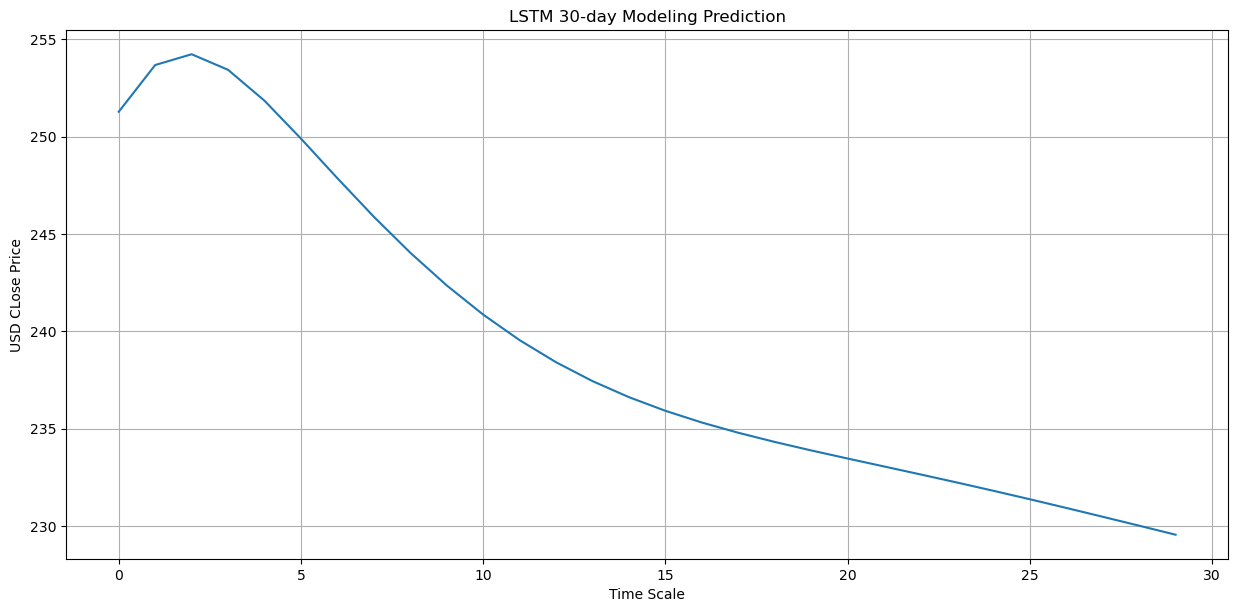

In [186]:
plt.figure(figsize=(15,7), dpi=100)
plt.grid(True)
plt.title('LSTM 30-day Modeling Prediction')
plt.xlabel('Time Scale')
plt.ylabel('USD CLose Price')
plt.plot(pred2)
plt.show()

#plt.plot(lst_output)